<a href="https://colab.research.google.com/github/thalestmm/panorama_covid19/blob/main/Panorama_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Banner COVID-19" src="https://github.com/thalestmm/panorama_covid19/blob/main/covid_banner.jpg?raw=true" width="100%">

---
# **Panorama da COVID-19 no Brasil - *DEZ/21***

A COVID-19 é uma doença infecciosa causada pelo coronavírus SARS-CoV-2 e tem como principais sintomas febre, cansaço e tosse seca. (https://www.paho.org/pt/covid19)

Estudos indicam que a primeira infecção ocorreu no final de 2019 na cidade de Wuhan, na China. Desde então, a COVID vem infectando milhões de pessoas e, infelizmente, tirando muitas vidas.

Compreendendo a relevância do assunto e a importância da conscientização de todos acerca da doença, irei realizar uma análise sobre o panorama brasileiro durante esse tempo de pandemia, com dados atualizados até o mês de dezembro de 2021.



> *Este notebook foi desenvolvido em dezembro de 2021. No entanto, como a base de dados está sendo constantemente atualizada, também serão as informações aqui disponibilizadas.*



---

## **Obtenção dos dados**

Existem uma série de bases de dados e plataformas disponíveis pela internet, abordando os mais variados atributos da pandemia da COVID-19.

Porém, existe uma grande dificuldade, em se tratando de um assunto como uma doença nova, de determinar qual a fonte mais precisa e confiável de dados: governo federal, governos estaduais, organizações particulares, entre outras. Não necessariamente porque os dados poderiam estar sendo manipulados, mas muitas vezes pelos distintos métodos de registro empregados.

Para o intuito desta análise, no entanto, escolhi o banco de dados da organização OWID (https://ourworldindata.org/), que é atualizado diariamente e pode ser encontrado [aqui](https://github.com/owid/covid-19-data).

*Esse banco foi selecionado primeiramente por sua abrangência: inclui todos os países do mundo e os divide em continentes, o que facilita muito o trabalho de processamento. Outro ponto muito importante é o seu método de aquisição de dados: extremamente distribuído e descentralizado, o que fomenta maior confiabilidade, conforme pode ser observado [aqui](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv) (embora ainda dependa muito de informações governamentais).*

In [2]:
# Primeiramente, importamos as bibliotecas necessárias:
import numpy as np
import pandas as pd
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
default = plt.rcParams.copy()
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB',"#211d0c"])
plt.rc('axes', facecolor='#ededed', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#ededed')
plt.rc('lines', linewidth=1)

In [4]:
# Acessar o banco de dados e fazer o download da planilha:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

df_raw = pd.read_csv(url,index_col="date",parse_dates=True)

print(f"O arquivo original possui {df_raw.shape[0]-1} entradas (linhas) e {df_raw.shape[1]} atributos (colunas).\n")
print("Mais algumas informações:")
df_raw.info(verbose=False)

O arquivo original possui 139381 entradas (linhas) e 66 atributos (colunas).

Mais algumas informações:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139382 entries, 2020-02-24 to 2021-12-11
Columns: 66 entries, iso_code to excess_mortality_cumulative_per_million
dtypes: float64(62), object(4)
memory usage: 71.2+ MB


In [5]:
# As 5 primeiras linhas do arquivo original:
df_raw.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## **Contexto global da COVID-19**

*Antes de tratar do Brasil, vamos fazer uma breve comparação entre todos os países, passando por algumas informações relevantes.*

### **Evolução da doença pelo mundo**

A nossa fonte de registrou todos os dados desde *22 de janeiro de 2020* e, portanto, essa primeira visualização tratará dos fatos desta data até o dia de hoje.

In [6]:
df_world = df_raw.loc[df_raw.location == "World"].new_deaths_smoothed
df_world = df_world.to_frame()
df_world.new_deaths_smoothed = df_world.new_deaths_smoothed / 1000

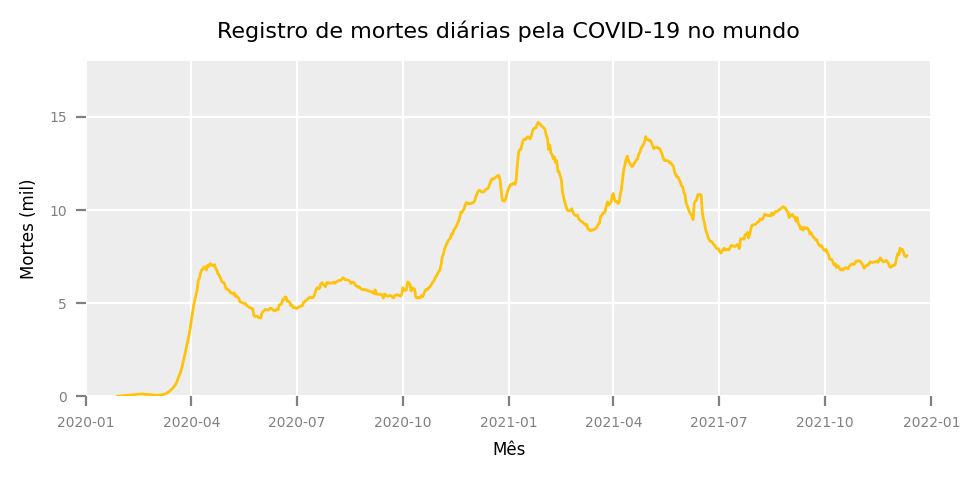

In [7]:
fig, ax = plt.subplots(figsize = (5,2.5),dpi=200)

ax.set_title("Registro de mortes diárias pela COVID-19 no mundo",fontsize=8,y=1.02)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.ylabel("Mortes (mil)",fontsize=6)
plt.xlabel("Mês",fontsize=6)
plt.ylim([0,18])
plt.xlim([date(2020,1,1),date(2022,1,1)])
plt.plot(df_world.index,df_world.new_deaths_smoothed,color="#FFC30B",aa=True)
plt.tight_layout()

Aqui utilizamos os valores de média móvel das mortes (`new_deaths_smoothed`), o que nos mostra uma certa tendência de evolução da doença.

In [8]:
total = df_raw.loc[df_raw.location == "World"].total_deaths.max() / 1000000

print(f"Total de Mortes até {date.today()}: {total:.3f} milhões")

Total de Mortes até 2021-12-13: 5.302 milhões


No espaço de tempo de 2 anos, podemos observar o impacto dessa doença no mundo: **mais de 5 milhões e 300 mil mortos**, além de ter causado mudanças extremas na forma como as empresas trabalham, em como nos relacionamos, nos nossos hábitos e estilos de vida.

### **Por Continentes**

### **Comparativo entre todos os países**

#### Os 5 países com o maior número de mortes

In [9]:
df_countries = df_raw.groupby("location").total_deaths.max().sort_values(ascending=False).iloc[9:14].to_frame()
df_countries.total_deaths = df_countries.total_deaths / 1000

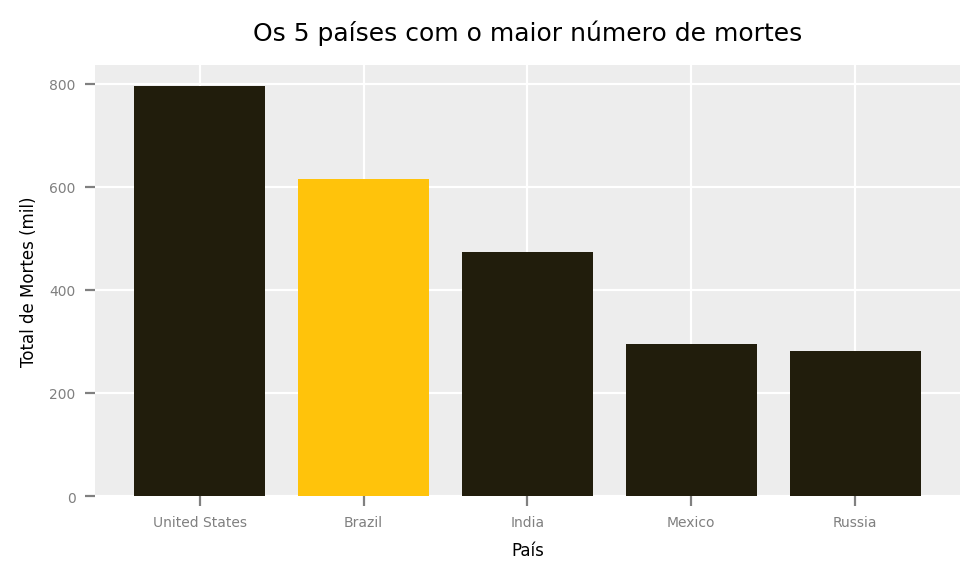

In [10]:
fig, ax = plt.subplots(figsize=(5,3),dpi=200)

ax.set_title("Os 5 países com o maior número de mortes",fontsize=9,y=1.02)
colors = ["#FFC30B" if key == "Brazil" else "#211d0c" for key,tot in df_countries.total_deaths.iteritems()]
plt.bar(x=df_countries.index,height="total_deaths",data=df_countries,color=colors)
plt.ylabel("Total de Mortes (mil)",fontsize=6)
plt.xlabel("País",fontsize=6)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tight_layout()

Como podemos observar nos gráficos, os **Estados Unidos** tiveram a maior quantidade de mortes, seguido pelo Brasil, Índia, México e Rússia.

Comparando com o total de mortes no mundo todo, temos como percentuais os seguintes valores:

In [11]:
world_total_deaths = df_raw.loc[df_raw.location == "World"].total_deaths.max()

percentage = {key : value / world_total_deaths for key, value in df_countries.total_deaths.iteritems()}

for key,value in percentage.items():
  print(f"{key}: {value*100:.2f}%")

United States: 0.02%
Brazil: 0.01%
India: 0.01%
Mexico: 0.01%
Russia: 0.01%


Não vamos tratar de assuntos como políticas públicas durante a pandemia, visto que esse não é o objetivo desta análise. No entanto, um fato que fica claro é o impacto da COVID-19 sobre o povo brasileiro.

*A partir de agora, trataremos especificamente sobre o Brasil.*

## **Sobre o Brasil**

Como pudemos ver, o arquivo original possui mais de *9 milhões* de células o que, além de trazer dados que não serão usados na nossa análise, também implica num maior uso de memória, e consequente diminuição na *performance* das funções a serem empregadas. 

*Por isso, antes de prosseguir para a Apresentação dos Dados, farei uma limpeza básica nos dados.*

#### Limpeza

In [12]:
# Manter somente os dados do Brasil (iso_code == "BRA")
wanted_iso_code = "BRA"
df_bra = df_raw.loc[df_raw.iso_code == wanted_iso_code].copy()

# Excluir colunas redundantes: Continente e nome do País
df_bra = df_bra.drop(axis=1,columns=["continent","location","iso_code"])

# Excluir colunas que estão completamente nulas
df_bra = df_bra.dropna(how='all', axis=1)

# Excluir colunas que não serão usadas
df_bra = df_bra.drop(axis=1,columns=["tests_units",
                                     "excess_mortality_cumulative_absolute",
                                     "excess_mortality_cumulative",
                                     "excess_mortality",
                                     "excess_mortality_cumulative_per_million",
                                     "new_tests",
                                     "total_tests",
                                     "total_tests_per_thousand",
                                     "new_tests_per_thousand",
                                     "new_tests_smoothed",
                                     "new_tests_smoothed_per_thousand",
                                     "human_development_index",
                                     "life_expectancy",
                                     "extreme_poverty",
                                     "gdp_per_capita",
                                     "diabetes_prevalence",
                                     "cardiovasc_death_rate",
                                     "new_cases_per_million",
                                     "total_cases_per_million",
                                     "new_cases_smoothed_per_million",
                                     "total_deaths_per_million",
                                     "new_deaths_per_million",
                                     "new_deaths_smoothed_per_million",
                                     "total_vaccinations_per_hundred",
                                     "people_vaccinated_per_hundred",
                                     "people_fully_vaccinated_per_hundred",
                                     "total_boosters_per_hundred",
                                     "new_vaccinations_smoothed_per_million",
                                     "new_people_vaccinated_smoothed_per_hundred",
                                     "aged_70_older",
                                     "aged_65_older",
                                     "hospital_beds_per_thousand"])

print(f"O novo arquivo possui {df_bra.shape[0]-1} entradas (linhas) e {df_bra.shape[1]} atributos (colunas).\n")
print("Mais algumas informações:")
df_bra.info(verbose=False)

O novo arquivo possui 654 entradas (linhas) e 20 atributos (colunas).

Mais algumas informações:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 655 entries, 2020-02-26 to 2021-12-11
Columns: 20 entries, total_cases to male_smokers
dtypes: float64(20)
memory usage: 107.5 KB


Por enquanto apagamos colunas redundantes, como nome do país e do continente, além de colunas que estavam completamente nulas, pois os dados não foram disponibilizados pelo governo ou, ainda, colunas que não incluem dados relevantes para a nossa análise. Assim, reduzimos o número de colunas para 20.

*Ainda restam alguns valores ausentes, mas lidaremos com eles mais adiante.*

In [13]:
# As 5 primeiras linhas do novo conjunto de dados:
df_bra.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,female_smokers,male_smokers
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,10.1,17.9
2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,10.1,17.9
2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,10.1,17.9
2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,10.1,17.9
2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,10.1,17.9


### **Dicionário de Variáveis**

Agora que isolamos as colunas que iremos utilizar, esses são os seus significados: 
* `total_cases`: total de casos confirmados
* `new_cases`: novos casos confirmados no respectivo dia
* `total_deaths`: total de mortes
* `new_deaths`: novas mortes no respectivo dia
* `reproduction_rate`: um valor calculado da taxa de reprodução da doença pelo mundo
* `total_vaccinations`: total de doses administradas
* `people_vaccinated`: total de pessoas que já tomaram pelo menos uma dose da vacina
* `people_fully_vaccinated`: total de pessoas com o esquema vacinal completo
* `total_boosters`: total de pessoas que tomaram doses extras (além da quantidade recomendada de cada fabricante)
* `new_vaccinations`: quantidade de doses administradas no respectivo dia
* `stringency_index`: um valor calculado a partir de alguns dados, como escolas fechadas, comércios fechados e restrições de viagens variando de 0 a 100 (100 é a maior restrição)
* `population`: população do país
* `population_density`: população dividida pela área do país, em m<sup>2</sup>
* `median_age`: mediana da idade dos habitantes do país
* `female_smokers`: porcentagem de mulheres fumantes no país
* `male_smokers`: porcentagem de homens fumantes no país
---
 *OBS:*  `new_cases_smoothed`, `new_deaths_smoothed`, `new_vaccinations_smoothed` e `new_people_vaccinated_smoothed` (todas as colunas com `_smoothed`) tratam dos mesmos dados que as originais, mas com os valores amortecidos (médias móveis) de 7 dias.

### **Lidando com valores ausentes**

#### Porcentagem de valores ausentes por coluna:

In [14]:
na_percentage = 1 - (df_bra.count() / df_bra.shape[0])
for key,value in na_percentage.iteritems():
  print(f"{key}: {value*100:.2f}%")

total_cases: 0.00%
new_cases: 0.15%
new_cases_smoothed: 0.76%
total_deaths: 3.05%
new_deaths: 3.05%
new_deaths_smoothed: 0.76%
reproduction_rate: 3.05%
total_vaccinations: 49.77%
people_vaccinated: 49.77%
people_fully_vaccinated: 52.67%
total_boosters: 84.58%
new_vaccinations: 49.92%
new_vaccinations_smoothed: 49.92%
new_people_vaccinated_smoothed: 49.92%
stringency_index: 0.15%
population: 0.00%
population_density: 0.00%
median_age: 0.00%
female_smokers: 0.00%
male_smokers: 0.00%


Valores ausentes podem existir em um banco de dados por uma série de motivos. No nosso caso, como se trata de uma nova doença, muitos dados como quantidade de mortes e de vacinados provavelmente não estão completos pois tais fatos só passaram a ocorrer a partir de um certo momento, e desse momento pra frente foram contabilizados.

Por isso, estaremos tratando todos os valores ausentes como 0 (zero), mas ainda mantendo os dados como vieram.

### **O começo da pandemia no Brasil**

In [15]:
def find_first(column,df=df_bra):
  return df[column].first_valid_index()

cols = ["new_cases","new_deaths","people_vaccinated","people_fully_vaccinated","total_boosters"]
cols_dates = {i: find_first(i).date() for i in cols}
for key,value in cols_dates.items():
  print(f"{key}: {value}")
days_between = (cols_dates["new_deaths"] - cols_dates["new_cases"]).days
print(f"\nA primeira morte ocorreu {days_between} dias depois de ser registrado o 1º caso.")

new_cases: 2020-02-26
new_deaths: 2020-03-17
people_vaccinated: 2021-01-17
people_fully_vaccinated: 2021-02-05
total_boosters: 2021-09-02

A primeira morte ocorreu 20 dias depois de ser registrado o 1º caso.


Como podemos ver, o primeiro caso registrado ocorreu em **26 de fevereiro de 2020**. Já a primeira morte ocorreu no dia **17 de março**, **20 dias depois** da confirmação do primeiro caso. [Estudos](https://theconversation.com/coronavirus-how-long-does-it-take-to-get-sick-how-infectious-is-it-will-you-always-have-a-fever-covid-19-basics-explained-132963) indicam que o tempo médio entre a infecção e a fatalidade gira em torno de **13 dias** (5-6 dias de incubação e 1 semana de desenvolvimento da doença), o que corrobora com os dados do Brasil. 

As vacinas só chegaram mais tarde ao Brasil, e o primeiro registro data de **17 de janeiro de 2021**. As primeiras pessoas completaram o seu cartão de vacina no dia **05 de fevereiro**, e as primeiras doses de reforço começaram a ser administradas no dia **02 de setembro**.

### **A evolução da COVID-19**

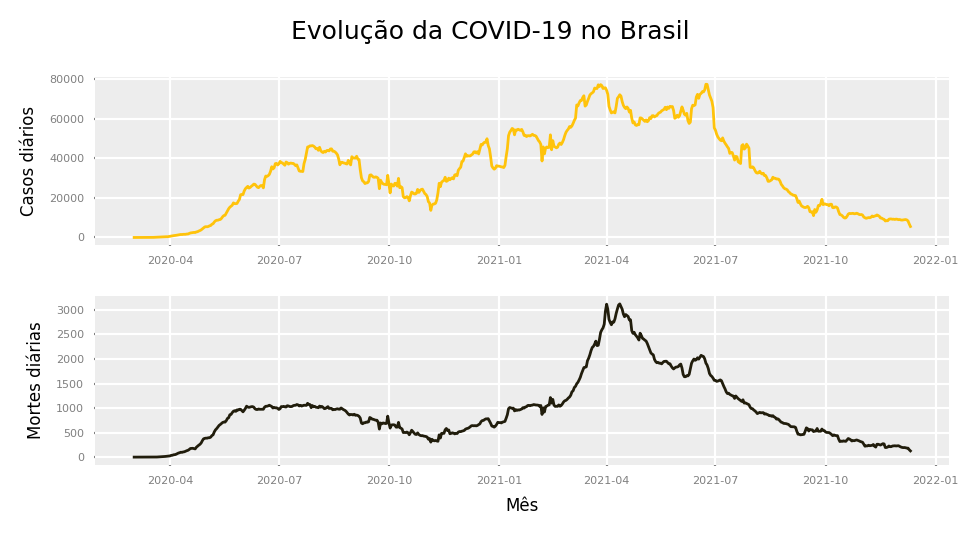

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(5,2.5),dpi=200)
plt.xlabel("Mês",fontsize=6)
ax1.tick_params(length=0.5,labelsize=4)
ax2.tick_params(length=0.5,labelsize=4)
ax1.set_ylabel("Casos diários",fontsize=6)
ax2.set_ylabel("Mortes diárias",fontsize=6)
plt.suptitle("Evolução da COVID-19 no Brasil", fontsize=9,y=1.05)
ax1.plot(df_bra.index,df_bra.new_cases_smoothed,color="#FFC30B")
ax2.plot(df_bra.index,df_bra.new_deaths_smoothed,color="#211d0c")
plt.tight_layout()

In [17]:
def find_index_max(column,df=df_bra):
  date = df[column].idxmax().date()
  maximum = df[column].max()
  return (date,maximum)

cols = ["new_cases","new_deaths"]
cols_dates = {i: find_index_max(i) for i in cols}

print(f"A média de casos diários foi {int(df_bra.new_cases.mean())}. O valor máximo foi {int(cols_dates['new_cases'][1])}, registrado em {cols_dates['new_cases'][0]}.")
print(f"\nA média de mortes diárias foi {int(df_bra.new_deaths.mean())}. O valor máximo foi {int(cols_dates['new_deaths'][1])}, registrado em {cols_dates['new_deaths'][0]}.")

A média de casos diários foi 33680. O valor máximo foi 115228, registrado em 2021-06-23.

A média de mortes diárias foi 970. O valor máximo foi 4249, registrado em 2021-04-08.


No Brasil, houve uma média de **33680** casos por dia da doença, com **970** mortes. No dia *23 de junho de 2021* foi registrado o maior número de casos confirmados em um dia, **115228**. O maior número de mortes, por sua vez, foi de **4249**, em *08 de abril de 2021*.

Da relação entre a quantidade de mortes e de casos confirmados por dia, podemos calcular a taxa de mortalidade, conforme o gráfico abaixo.

In [18]:
df_bra["case_death_ratio"] = (df_bra.new_deaths_smoothed / df_bra.new_cases_smoothed) * 100

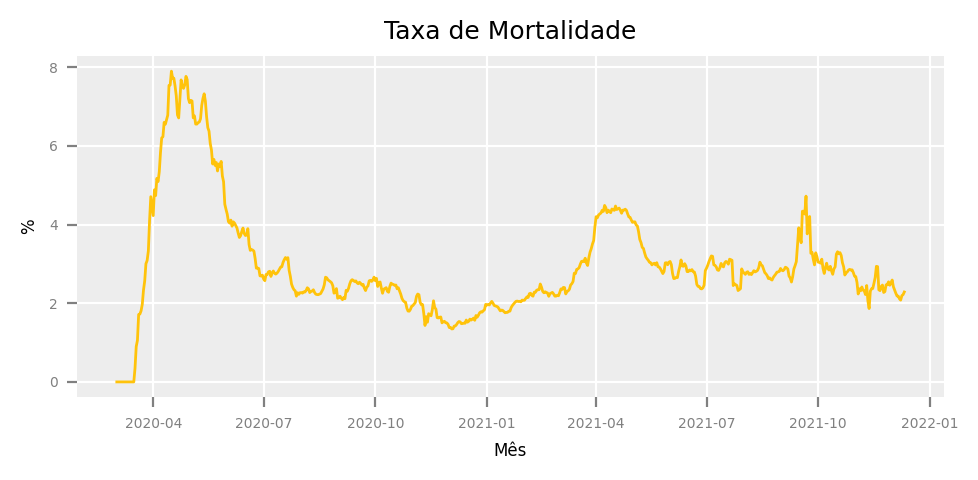

In [19]:
fig,ax = plt.subplots(figsize=(5,2.5),dpi=200)
plt.ylabel("%",fontsize=6)
plt.xlabel("Mês",fontsize=6)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title("Taxa de Mortalidade", fontsize=9)
plt.yscale("linear")
plt.plot(df_bra.case_death_ratio,color="#FFC30B")
plt.tight_layout()

In [20]:
dia, maximo = find_index_max("case_death_ratio")
print(f"A média da taxa de mortalidade foi de {df_bra.case_death_ratio.mean():.2f}%. Já o valor máximo foi de {maximo:.2f}%, registrado no dia {dia}.")
global_mean = (df_raw.loc[df_raw.location == "World"].new_deaths_smoothed.mean() / df_raw.loc[df_raw.location == "World"].new_cases_smoothed.mean()) * 100
print(f"\nMédia Global: {global_mean:.2f}%")

A média da taxa de mortalidade foi de 2.96%. Já o valor máximo foi de 7.90%, registrado no dia 2020-04-16.

Média Global: 1.97%


Como podemos ver, a COVID-19 apresentou maiores taxas de mortalidade nos primeiros meses, com o valor máximo de **7,90%**, no dia *16 de abril de 2020*. Já a média da taxa de mortalidade brasileira foi de **2,96%**, cerca de 1% mais alta que a média global de **1,97%**.

### **Mapa de Calor**

Podemos desenhar um mapa de calor com as variáveis, isto é, um gráfico que representa a correlação (não necessariamente causa e efeito) entre as variáveis do nosso banco de dados.
No gráfico, os valores mais próximos de 1.0 (forte correlação positiva), estão pintados na cor dourada. Aqueles com uma forte correlação negativa (próximos de -1.0), estão pintados na cor marrom escuro.

##### *Apagando as colunas* `_smoothed`

In [21]:
heat_df = df_bra.iloc[:,0:15]
heat_df.drop(columns=['new_cases_smoothed','new_deaths_smoothed','new_vaccinations_smoothed','new_people_vaccinated_smoothed'],inplace=True)
heat_df=heat_df.corr()
colors = cycler('color',['#ffffff'])
plt.rc('axes', facecolor='#ffffff', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)

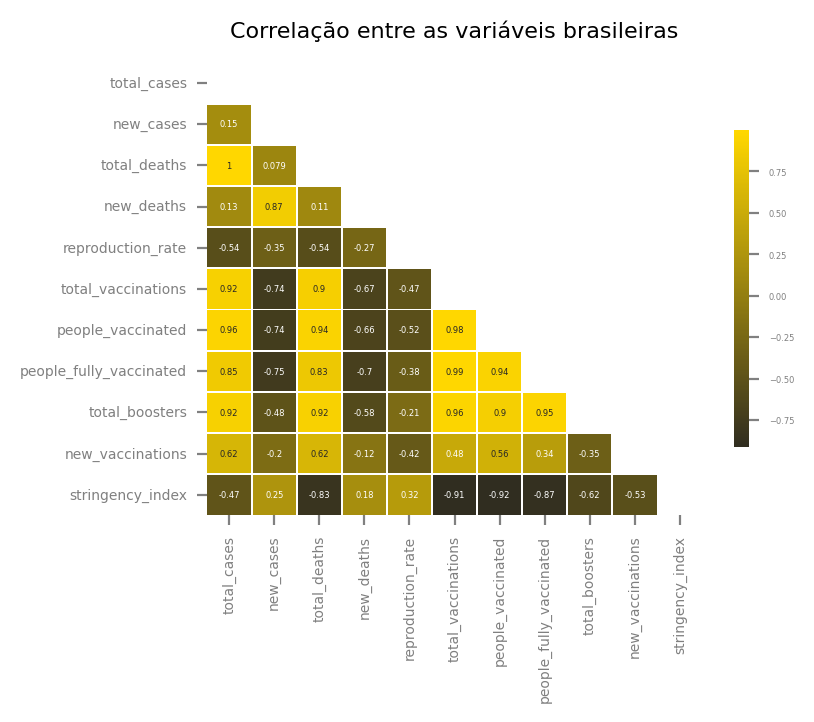

In [22]:
fig,ax = plt.subplots(figsize=(4,3),dpi=200)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title("Correlação entre as variáveis brasileiras", fontsize=8,y=1.02)
cmap = sns.dark_palette("gold",as_cmap=True)
mask = np.triu(np.ones_like(heat_df, dtype=bool))
sns.heatmap(data=heat_df,annot=True,mask=mask,center=0,linewidths=0.3,annot_kws={"fontsize":3},cmap=cmap,cbar_kws={"shrink": .7});
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=3)

Nem todas as comparações entre as variáveis são adequadas. Por exemplo, comparar o total de casos com o número de vacinados não irá nos dizer que os dois valores possuem uma relação de causa e efeito, apesar da alta correlação. 

Uma interpretação mais adequada pode ser comparar o total de vacinados (`people_fully_vaccinated`), com o número de mortes diárias (`new_deaths`). Nesse caso, observamos uma correlação de **-0,7**, isto é, quanto maior o número de pessoas vacinadas, a tendência é que a quantidade diária de mortes diminua, como se espera que seja o efeito da vacinação em massa.

## **Conclusão**

Apesar de não termos nos aprofundado extremamente nos maiores detalhes da pandemia da COVID-19, foi possível determinar o seu grande impacto no mundo como um todo, e especialmente no Brasil, como o país com o 2º maior número de mortes até hoje.

Foi possível, também, observar uma série de tendências e correlações, que muitas vezes não conseguimos considerar sem uma certa análise.

Por fim, acredito e espero que tenha conseguido conscientizar você, leitor, da necessidade de tomar os cuidados necessários com relação a essa doença, para que possamos voltar ao normal o quanto antes.

Desde já agradeço a atenção e o tempo dedicado à leitura.

*Thales M. Meier*